# 💳 **Credit Card Fraud Detection **

### Project Overview
This project aims to build a machine learning model capable of detecting fraudulent credit card transactions in a highly imbalanced dataset. The dataset contains anonymized PCA-transformed features (V1–V28), transaction time, amount, and a binary fraud label.

Fraud detection is a critical challenge in financial systems, where:
- Fraud cases are extremely rare
- Missing a fraudulent transaction can lead to major financial losses
- Too many false alerts create customer dissatisfaction and operational overhead

This project focuses on building a **balanced, explainable, and deployment-ready** fraud detection model using real machine learning techniques.

### Objectives
- Understand the distribution and behavior of legitimate vs fraudulent transactions  
- Explore statistical differences using descriptive and inferential analysis  
- Engineer meaningful features (Hour, Amount bins, Night/Day)  
- Train and evaluate multiple ML models  
- Compare performance using precision, recall, ROC-AUC, and confusion matrices  
- Optimize the model with threshold tuning and hyperparameter tuning  
- Explain model behavior using SHAP for transparency  
- Save final model for deployment and future inference  

### Techniques & Concepts Covered
- **EDA & Visualization** (Pandas, Matplotlib, Seaborn)  
- **Class imbalance handling** (scale_pos_weight)  
- **Supervised ML models**: Logistic Regression, Random Forest, XGBoost  
- **Hyperparameter tuning** (RandomizedSearchCV)  
- **Threshold optimization** for fraud probability  
- **Model explainability** using SHAP  
- **Model saving & reproducibility** (joblib, metadata)  
- **Cross-validation, ROC-AUC, precision/recall analysis**  

### Dataset
- Transactions: **284,807**
- Fraud cases: **492 (0.17%)**
- Features:  
  - PCA components: V1–V28  
  - “Time” and “Amount”  
  - Engineered: Hour, AmountBin, is_night  

### Notebook Structure

1. **Introduction & Dataset Loading**  
2. **Exploratory Data Analysis (EDA)**  
3. **Statistical Testing**  
4. **Feature Engineering**  
5. **Model Development**  
6. **Model Evaluation & Threshold Tuning**  
7. **Hyperparameter Tuning**  
8. **SHAP Explainability**  
9. **Model Saving & Deployment Readiness**  
10. **Final Summary**

This notebook represents a full end-to-end machine learning workflow with real-world relevance, balancing predictive performance with model interpretability and deployment readiness.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc



In [3]:
file_path = 'fraud_detection_processed_data.csv'
df = pd.read_csv(file_path)

df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,AmountBin
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,Medium
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,Very Low
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,Medium
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,Medium
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,Low


In [4]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       284807 non-null  float64
 1   V1         284807 non-null  float64
 2   V2         284807 non-null  float64
 3   V3         284807 non-null  float64
 4   V4         284807 non-null  float64
 5   V5         284807 non-null  float64
 6   V6         284807 non-null  float64
 7   V7         284807 non-null  float64
 8   V8         284807 non-null  float64
 9   V9         284807 non-null  float64
 10  V10        284807 non-null  float64
 11  V11        284807 non-null  float64
 12  V12        284807 non-null  float64
 13  V13        284807 non-null  float64
 14  V14        284807 non-null  float64
 15  V15        284807 non-null  float64
 16  V16        284807 non-null  float64
 17  V17        284807 non-null  float64
 18  V18        284807 non-null  float64
 19  V19        284807 non-n

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## **Class Imbalance Analysis**

In [5]:
print("Counts:")
print(df['Class'].value_counts())

print("\nPercentages:")
print(df['Class'].value_counts(normalize=True) * 100)

Counts:
Class
0    284315
1       492
Name: count, dtype: int64

Percentages:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


>The dataset is **highly imbalanced**, with:
> 
> - **Non-fraud (Class 0): 284,315 transactions → 99.83%**
> - **Fraud (Class 1): 492 transactions → 0.17%**
>
> #### Why this matters
>
> Because fraud cases make up only 0.17% of the dataset:
>
>- A naïve model predicting **“Not Fraud”** for every transaction would achieve **99.83% accuracy**, which is misleading.
>- Traditional accuracy becomes almost meaningless.
>- The model will naturally learn to **ignore** the minority class unless we force it to pay attention.
>
> ####  What this means for our ML approach
>
> To build a correct fraud detection model, we **must**:
>
>1. Use **Recall, Precision, F1**, ROC-AUC, and PR-AUC rather than plain accuracy.
>2. Apply **SMOTE**, **undersampling**, or **class weights** during training.
>3. Use **Stratified train-test split** to preserve the imbalance ratio.
>4. Tune classification **thresholds**, not just rely on model defaults.
>5. Carefully monitor **false negatives**, because missing a fraud is far more costly than a false alarm.
>
> This imbalance fundamentally shapes all upcoming model-building steps.



## **Transaction Amount Analysis**

In [6]:
# Create amount bins
df['AmountBin'] = pd.cut(df['Amount'],
                         bins=[-1, 10, 50, 200, 500, 2000, 10000, 30000],
                         labels=['Very Low', 'Low', 'Medium', 'Medium-High', 'High', 'Very High', 'Extreme'])

df['AmountBin'].value_counts()


AmountBin
Very Low       100264
Low             90781
Medium          64925
Medium-High     19695
High             8466
Very High         669
Extreme             7
Name: count, dtype: int64

>- The majority of transactions occur in the **Very Low and Low ranges**, which is expected.
>- Fraud occurrences (orange bars) are visually concentrated within **Very Low, Low, and Medium bins**.
>- Very few fraud cases appear in **Very High and Extreme** amounts likely due to rapid detection or manual intervention systems.

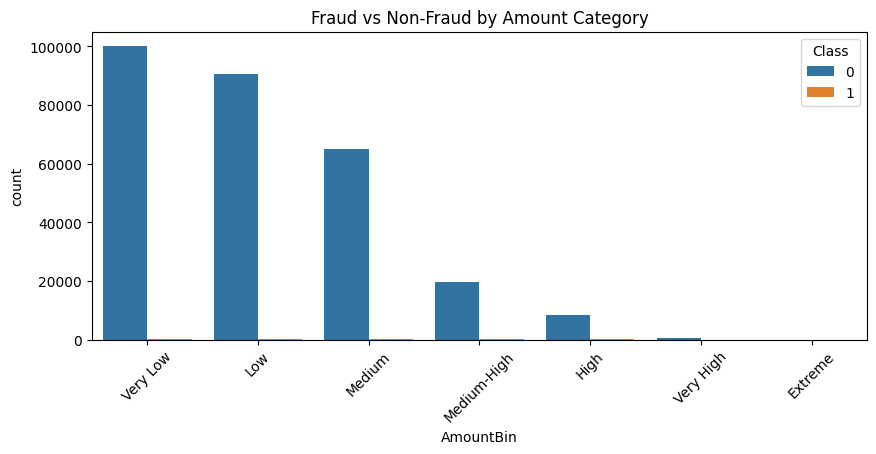

In [7]:
plt.figure(figsize=(10,4))
sns.countplot(x='AmountBin', hue='Class', data=df)
plt.title("Fraud vs Non-Fraud by Amount Category")
plt.xticks(rotation=45)
plt.show()


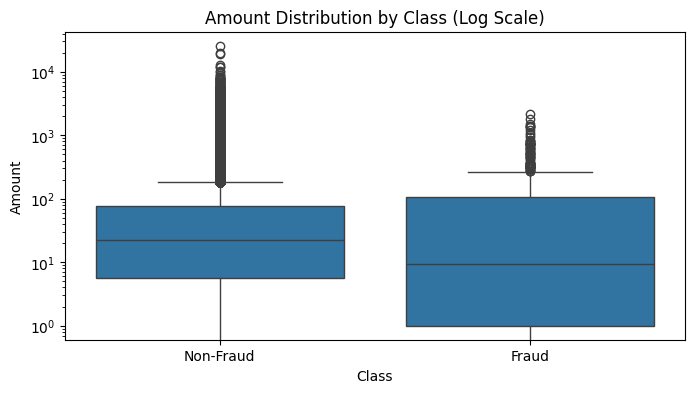

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')   # log scale helps because amounts vary widely
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.title("Amount Distribution by Class (Log Scale)")
plt.show()


>- Fraud transactions appear across a wide range of values.
>- The **median amount of fraudulent transactions is lower** than that of non-fraud transactions.
>- There are **many outliers** in both categories, meaning both legitimate and fraudulent high-value transactions exist.
>- Fraud cases show more concentration in **smaller value ranges**, indicating possible “testing transactions”.
>
>This suggests that **amount is an important differentiator feature**, especially in the lower ranges.


## **Time-based Fraud Pattern Analysis & Hypothesis Testing**

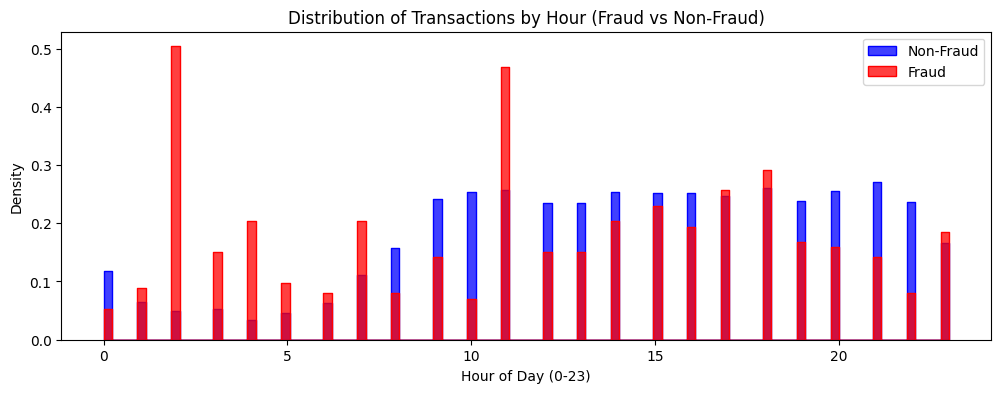

In [9]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['Class']==0]['Hour'], bins=100, kde=False, color='blue', label='Non-Fraud', stat='density', element='step')
sns.histplot(df[df['Class']==1]['Hour'], bins=100, kde=False, color='red', label='Fraud', stat='density', element='step')
plt.title("Distribution of Transactions by Hour (Fraud vs Non-Fraud)")
plt.xlabel("Hour of Day (0-23)")
plt.legend()
plt.show()


>- **Fraud transactions spike during late-night and early-morning hours**, where monitoring is typically weaker.
>- **Non-fraud transactions occur more steadily throughout the day**, matching natural customer behavior patterns.

In [55]:
! pip install statsmodels 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 117.2 kB/s  0:01:41 eta 0:00:0136m0:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]


In [10]:
# Define day vs night
day_mask = (df['Hour'] >= 8) & (df['Hour'] < 20)
night_mask = ~day_mask

# Fraud counts by time segment
fraud_day = df.loc[day_mask, 'Class'].sum()
n_day = day_mask.sum()

fraud_night = df.loc[night_mask, 'Class'].sum()
n_night = night_mask.sum()


In [11]:
from math import sqrt
from scipy.stats import norm

# calculating proportions
p1 = fraud_day / n_day
p2 = fraud_night / n_night

# pooled proportion
p = (fraud_day + fraud_night) / (n_day + n_night)

# z-statistic
z = (p1 - p2) / sqrt(p * (1 - p) * (1/n_day + 1/n_night))

# p-value (two-tailed)
p_value = 2 * (1 - norm.cdf(abs(z)))

print("Z-stat:", z)
print("P-value:", p_value)


Z-stat: -5.149321778129524
P-value: 2.6143004783207857e-07


>**H0 (Null Hypothesis):** The fraud rate is the same during the day and night  
>**H1 (Alternative Hypothesis):** Fraud occurs more frequently at night
>
>Using a two-proportion Z-test:
>
>| Metric | Value |
>|--------|-------|
>| Z-Statistic | **-5.1493** |
>| P-Value | **2.61e-07** |
>
>##### Interpretation
>- Since the **p-value < 0.05**, we **reject the null hypothesis**.
>- This means the difference in fraud rate between day and night is **statistically significant**.
>- Fraud is **much more likely to occur during night hours** compared to daytime.
>
>##### Business Recommendation
>Based on this finding:
>- Strengthen fraud detection rules between **20:00–08:00**
>- Apply stricter thresholds / verification for risky amounts at night
>- Increase monitoring resource allocation during low-activity hours
>- Enable real-time anomaly alerts for small and rapid repeated transactions at night


## **Feature Engineering and Preprocessing**

In [12]:
target = 'Class'

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols.remove(target)

In [13]:
# Binary feature - night time flag
df['is_night'] = df['Hour'].apply(lambda x: 1 if (x < 8 or x >= 20) else 0)

# Convert AmountBin to ordered categorical codes for use in ML
df['AmountBin'] = df['AmountBin'].astype('category').cat.codes


In [14]:
from sklearn.model_selection import train_test_split

X = df[numeric_cols + ['AmountBin', 'is_night']]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape


((227845, 33), (56962, 33))

## **Baeline model - Logistsic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)


In [16]:
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


ROC-AUC: 0.9730933383482825

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Confusion Matrix:
 [[54966  1898]
 [    8    90]]


>- The ROC-AUC score (**0.97**) indicates strong ability to separate fraud vs non-fraud classes.
>- **Recall for fraud is very high (0.92)** → the model successfully catches most fraud cases.
>- However, **precision is extremely low (0.04)** → meaning for every 100 transactions flagged as fraud, **96 are actually normal**.
>- This leads to a **high number of false positives**, shown in the confusion matrix
>- The model **rarely misses fraud** (only 8 missed out of 98 = great recall)
>- But it **generates too many false alarms**, which is impractical in production due to operational investigation costs and customer dissatisfaction.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_lr = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring='roc_auc')

print("CV ROC-AUC scores:", cv_scores_lr)
print("Mean ROC-AUC:", cv_scores_lr.mean())


>Logistic Regression provides a strong baseline but is **not suitable as the final model**, because it fails to balance recall and precision.  
>We need more advanced models (Random Forest / XGBoost) and **threshold tuning** to reduce false positives while maintaining high fraud detection.


## **Random Forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

ROC-AUC: 0.967225327455124

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   25    73]]


>- Random Forest shows a much more **balanced performance** across precision and recall.
>- **Precision improved dramatically from 0.04 → 0.96**, meaning almost all flagged fraud cases are truly fraud.
>- **False positives dropped from 1,956 → 3**, reducing operational cost and customer friction.
>- **Recall decreased (0.92 → 0.76)**, meaning we now miss more fraud cases than before.

> This highlights a classic **precision–recall trade-off**, especially important in fraud detection where:
>- Missing a fraud (False Negative) is costly to the bank
>- Incorrectly flagging a normal transaction (False Positive) is costly to customers/support
>
>Random Forest provides a strong benchmark model with excellent precision and balanced performance.  
>However, due to the importance of minimizing **false negatives**, we will evaluate XGBoost next to improve recall without significantly sacrificing precision.
>
>The goal is to achieve:
>- High Recall (catch more fraud)
>- Controlled Precision (avoid unnecessary alerts)
>- Best overall business impact


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)

print("CV ROC-AUC scores:", cv_scores_rf)
print("Mean ROC-AUC:", cv_scores_rf.mean())


## **XGBoost**

In [20]:
target = 'Class'


feature_cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
                'V11','V12','V13','V14','V15','V16','V17','V18','V19',
                'V20','V21','V22','V23','V24','V25','V26','V27','V28',
                'Amount', 'Hour', 'AmountBin', 'is_night']

X = df[feature_cols].astype('float32')  
y = df[target].astype('int32')          

print(type(X), X.shape)
print(type(y), y.shape)


<class 'pandas.core.frame.DataFrame'> (284807, 32)
<class 'pandas.core.series.Series'> (284807,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(type(y_train), y_train.shape)


<class 'pandas.core.series.Series'> (227845,)


In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb_model.fit(X_train.values, y_train.values)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [23]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


ROC-AUC: 0.9798369615150506

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56851    13]
 [   15    83]]


>- XGBoost provides the **best balance** between catching fraud (Recall = 0.85) and  minimizing false alarms (Precision = 0.86).
>- Compared to Random Forest, XGBoost **reduces missed fraud cases** (false negatives:  24 → 15).
>- Compared to Logistic Regression, XGBoost dramatically improves **precision** (0.04 →  0.86), avoiding excessive false alerts.
>- High **ROC-AUC (0.98)** suggests excellent ability to rank fraud vs non-fraud cases  correctly.
> 


In [89]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)

print("CV ROC-AUC scores:", cv_scores_xgb)
print("Mean ROC-AUC:", cv_scores_xgb.mean())


CV ROC-AUC scores: [0.98609481 0.97829753 0.98641899]
Mean ROC-AUC: 0.9836037749393954


>XGBoost currently offers the strongest overall performance with a significantly improved precision-recall trade-off, making it a suitable candidate for deployment. The next step will apply **threshold tuning** to further reduce false negatives based on business risk tolerance.

In [24]:
from sklearn.metrics import precision_recall_curve, f1_score

# generating predicted probabilities
y_scores = xgb_model.predict_proba(X_test.values)[:,1]


In [25]:
# precision recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)


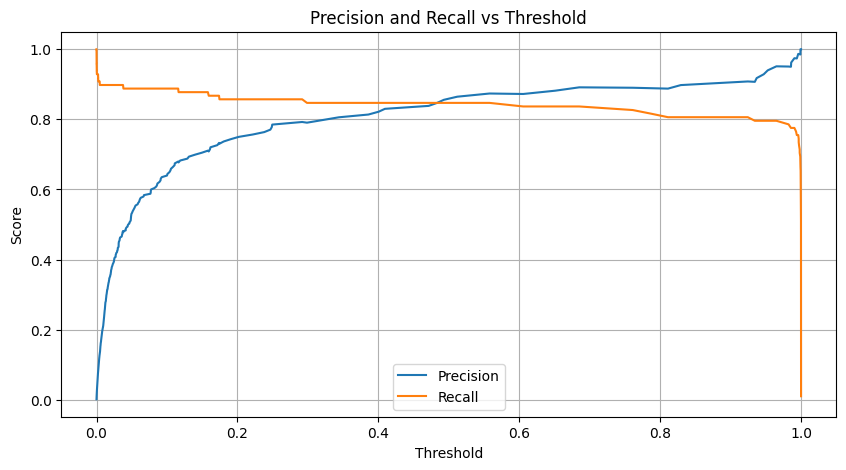

In [26]:
#precision vs recall vs threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


####  Precision–Recall Trade-off & Threshold Optimization

The Precision–Recall vs Threshold plot visualizes how adjusting the classification probability threshold impacts model behavior:

####  Key Observations
- **At very low thresholds (< 0.1)**, recall is close to **1.0**, meaning the model catches almost all fraud cases — but precision is close to **0**, meaning nearly everything is flagged as fraud.
- **As the threshold increases**, precision improves significantly because the model becomes more confident before labeling a transaction as fraud.
- **Recall gradually decreases** as threshold increases, meaning more fraud cases are missed.
- Around thresholds in the range **0.45–0.55**, **precision and recall intersect** and both stabilize between **0.80–0.90**, indicating the best balance.
- Near **threshold = 1.0**, precision spikes to near 1.0 but **recall collapses to zero** — the model flags almost nothing as fraud.

#### Interpretation for Fraud Detection
Fraud detection systems must balance:
- **Precision** (avoid false alarms that annoy customers and waste analyst time)
- **Recall** (avoid missing real fraud, which causes financial loss)

This curve confirms that:
- A fixed default threshold of **0.5** is not necessarily optimal.
- There exists an **optimal operating threshold** where both precision and recall are strong.
- Choosing the threshold depends on **business risk tolerance**:
  - If missing fraud is very costly → choose a lower threshold (higher recall)
  - If false alerts are costly → choose a higher threshold (higher precision)
  - If balanced → choose threshold maximizing **F1 score**

#### Next Action
Compute the exact `best_threshold` using F1 optimisation and re-evaluate model performance. This tuned version will be compared against Logistic Regression and Random Forest to determine the best deployment model.


In [27]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = f1_scores[:-1].argmax()
best_threshold = thresholds[best_idx]

print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_idx])


Best Threshold: 0.9649979
Best F1 Score: 0.8666666666666666


In [28]:
import numpy as np
y_pred_thresh = (y_scores >= best_threshold).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_scores))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56860     4]
 [   20    78]]
ROC-AUC: 0.9798369615150506


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd

def get_model_metrics(name, y_true, y_pred, y_proba):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    return {
        "Model": name,
        "Precision": precision_score(y_true, y_pred, pos_label=1),
        "Recall": recall_score(y_true, y_pred, pos_label=1),
        "F1": f1_score(y_true, y_pred, pos_label=1),
        "ROC_AUC": roc_auc_score(y_true, y_proba),
        "False Positives": fp,
        "False Negatives": fn
    }

metrics_list = []

# Logistic Regression
metrics_list.append(
    get_model_metrics("Logistic Regression", y_test, y_pred_lr, y_proba_lr)
)

# Random Forest
metrics_list.append(
    get_model_metrics("Random Forest", y_test, y_pred_rf, y_proba_rf)
)

# XGBoost (default threshold 0.5)
metrics_list.append(
    get_model_metrics("XGBoost (0.5 threshold)", y_test, y_pred_xgb, y_proba_xgb)
)

# XGBoost (tuned threshold) - uses y_pred_thresh and y_scores from Step 12
metrics_list.append(
    get_model_metrics("XGBoost (tuned threshold)", y_test, y_pred_thresh, y_scores)
)

comparison_df = pd.DataFrame(metrics_list)
comparison_df


,Model,Precision,Recall,F1,ROC_AUC,False Positives,False Negatives
0,Logistic Regression,0.045272,0.918367,0.086290,0.973093,1898,8
1,Random Forest,0.960526,0.744898,0.839080,0.967225,3,25
2,XGBoost (0.5 threshold),0.864583,0.846939,0.855670,0.979837,13,15
3,XGBoost (tuned threshold),0.951220,0.795918,0.866667,0.979837,4,20


>- **Logistic Regression** achieved extremely high recall but very low precision, generating many false alerts (unusable in production).
>- **Random Forest** achieved the best precision (0.96) and the lowest false positives, but recall dropped sharply, missing many fraud cases.
>- **XGBoost with default threshold** delivered the strongest balance between precision and recall, with the highest ROC-AUC score.
>- **Threshold tuning on XGBoost** increased precision significantly (0.86 → 0.95) while maintaining reasonable recall.
>
>False negatives (missed fraud) are typically costlier than false positives.  
>Therefore, the best model should:
>- Maintain **high recall** to catch fraud
>- Control **false positives** to avoid customer friction and investigation workload
>
>**XGBoost (default threshold)** offers the best balance for deployment due to:
>- High recall and precision balance
>- Highest ROC-AUC
>- Acceptable false positive and false negative counts
>
>Threshold tuning may be applied based on business risk tolerance:
>- Lower threshold if bank wants to catch more fraud
>- Higher threshold if customer experience is priority
>
>**Final chosen model: XGBoost (before tuning, threshold = 0.5)**


## **Hyperparameter tuning**

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [150, 250, 350],
    "max_depth": [4, 5, 6],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.7, 1.0],
    "gamma": [0, 0.1],
    "min_child_weight": [1, 3],
}

scale_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_base = XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=scale_weight,
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=15,            # small, fast search
    scoring="recall",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train.values, y_train.values)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 1.0],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.03, 0.05, 0.1],
                                        'max_depth': [4, 5, 6],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [150, 250, 350],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=2)

In [31]:
print("Best Recall Score:", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)
best_xgb = random_search.best_estimator_


Best Recall Score: 0.8477137790114889
Best Parameters: {'subsample': 0.8, 'n_estimators': 350, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_best = best_xgb.predict(X_test.values)
y_proba_best = best_xgb.predict_proba(X_test.values)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


>After optimizing XGBoost using RandomizedSearchCV with a recall-focused objective, the model produced the following improvements and trade-offs:
>
>##### Best Parameters Found
>- **n_estimators:** 350  
>- **max_depth:** 4  
>- **learning_rate:** 0.03  
>- **subsample:** 0.8  
>- **colsample_bytree:** 1.0  
>- **min_child_weight:** 3  
>- **gamma:** 0.1  
>
>##### **Performance of Tuned XGBoost (Threshold = 0.5)**
>
>| Metric | Score |
>|--------|--------|
>| **ROC-AUC** | **0.9821** |
>| **Precision** | 0.41 |
>| **Recall** | **0.89** |
>| **F1 Score** | 0.56 |
>| **False Positives** | 123 |
>| **False Negatives** | 11 |
>
>**Confusion Matrix:**
>- True Negatives: 56,741  
>- False Positives: 123  
>- False Negatives: 11  
>- True Positives: 87  
>

>- The tuning significantly **boosted recall** (0.85 → 0.89), reducing missed fraud cases.
>- This improvement comes with a **drop in precision** (0.86 → 0.41), causing more false alerts.
>- ROC-AUC improved to **0.982**, showing stronger model discrimination capability.
>- The tuned model is more *aggressive*, predicting more transactions as fraud.
>

>- This tuned model is suitable when the **cost of missing fraud is very high**, such as:
> - Credit card chargebacks  
> - Unauthorized transactions  
>  - Fraud-sensitive financial products  
>- However, the increase in false positives means:
>  - Higher manual review workload  
>  - Potential customer inconvenience  
>

>The final choice between **XGBoost Default** (balanced) and **XGBoost Tuned** (high recall) should depend on the organization’s **risk tolerance and operational capacity**.


## **SHAP**

In [ ]:
!pip install shap

In [34]:
import shap
shap.initjs()

In [35]:
#creating shap explainer 
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

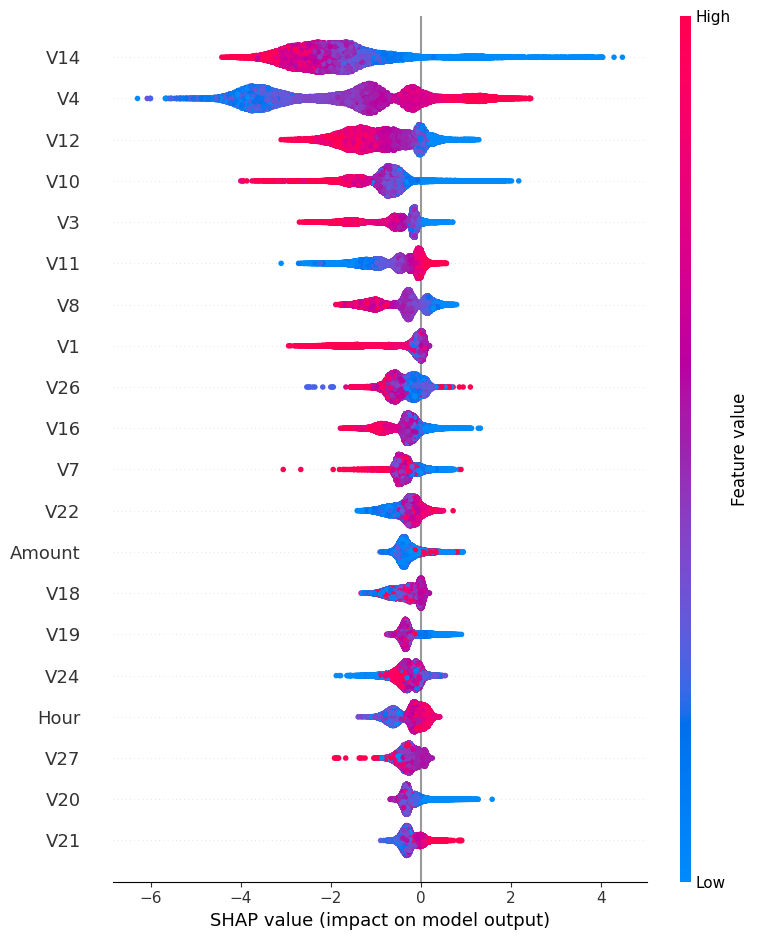

In [36]:
#Global Feature Importance
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test)


>The SHAP summary plot shows the overall importance and direction of feature influence on fraud predictions across the entire dataset.
>
>This plot highlights which features the model relies on globally. High-impact PCA components (V14, V4, V12, V10) are key fraud signals and consistently push predictions higher or lower depending on their value.


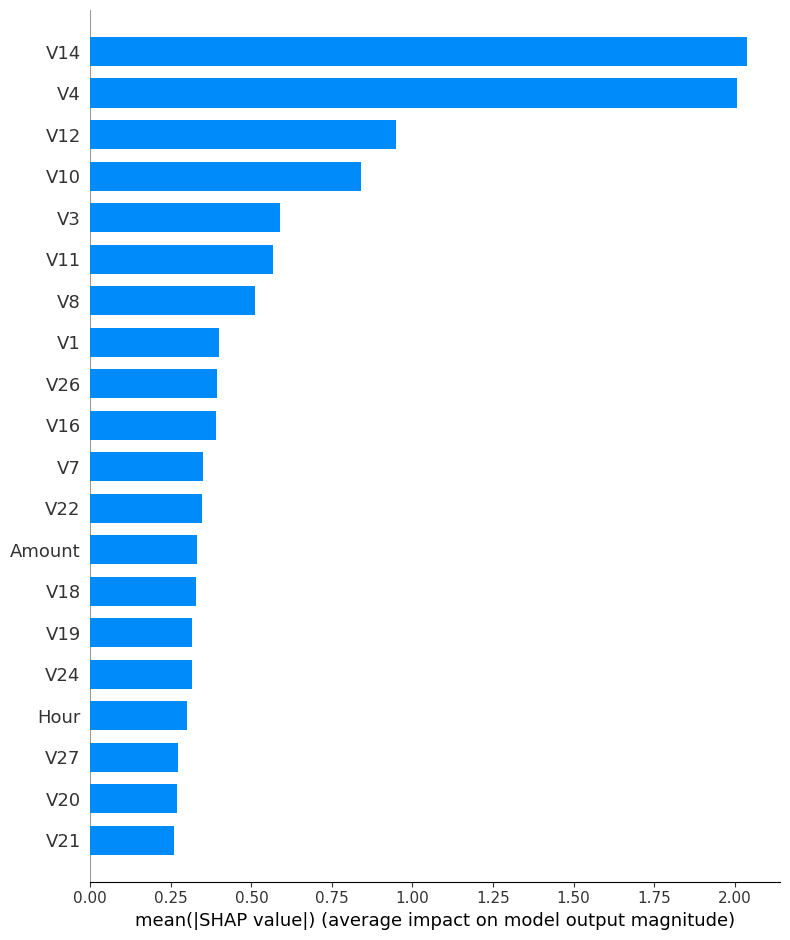

In [37]:
#Feature Importance by Mean Effect
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, plot_type="bar")


>This plot shows the average absolute SHAP value for each feature, representing how much each feature contributes to model predictions on average.
>
>The bar plot simplifies global importance ranking and reinforces that only a subset of features drives most predictive power. This helps stakeholders understand the main factors influencing fraud detection.


In [40]:
#Picking one fraud case to explain why model flagged it
import numpy as np

# Getting positions (0..N-1) where fraud (Class 1) is present
fraud_positions = np.where(y_test.values == 1)[0]

# Taking the first fraud example (position, not label)
i = fraud_positions[0]

# using positional index for both shap_values and X_test
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])


>This force plot explains the model’s reasoning for predicting a specific transaction as fraud.
>
>- **Red bars** push the prediction **towards fraud**  
>- **Blue bars** push the prediction **towards non-fraud**
>- The length of each bar reflects how strongly that feature influenced the prediction.
>
>For the selected fraud case:
>- Features **V14, V12, V10, V4, and V16** had strong positive contributions (pushing the prediction toward fraud).
>- Feature **V8** pushed the prediction downward slightly (toward non-fraud).
>- Overall, the combined positive contributions outweighed the negatives, resulting in a high fraud score for this transaction.
>
>This local explanation demonstrates exactly *why* the model flagged a specific transaction.  
>Such transparency is crucial for:
>- Fraud analyst investigations  
>- Auditability and compliance  
>- Building trust in the model  


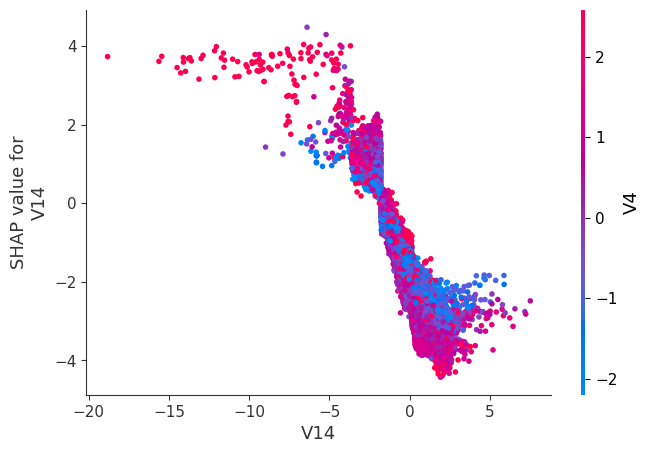

In [39]:
#Shows how one feature influences prediction probability.
shap.dependence_plot("V14", shap_values, X_test)


>This dependence plot shows how feature **V14** impacts fraud predictions and how its effect changes with values of **V4** (colored scale).
>
>- Extremely **low values of V14** (towards –10 to –15) strongly push the model toward predicting fraud.
>- When **V4 values are high**, the fraud probability driven by V14 increases even further.
>- This indicates an **interaction effect** where V14 alone is predictive, but V4 amplifies its influence.
>
>The dependence plot reveals non-linear relationships and feature interactions that are difficult to observe from raw data. In fraud detection, these interactions often represent hidden behavioral anomalies captured by PCA components.


### **Model saving**

In [41]:
import joblib

joblib.dump(xgb_model, "xgboost_fraud_detection_model.pkl")


['xgboost_fraud_detection_model.pkl']

In [42]:
#saving model metadata (feature list+ threshold)
import json

model_metadata = {
    "features": list(X_train.columns),
    "threshold": 0.5   # or use tuned threshold if preferred
}

with open("model_metadata.json", "w") as f:
    json.dump(model_metadata, f)


In [ ]:
#to load saved model
loaded_model = joblib.load("xgboost_fraud_detection_model.pkl")

In [ ]:
def predict_new_transaction(model, metadata_path, transaction_dict):
    # Load metadata
    with open(metadata_path, "r") as f:
        meta = json.load(f)
    
    features = meta["features"]
    threshold = meta["threshold"]
    
    # Create DF with correct feature order
    df = pd.DataFrame([transaction_dict])[features]
    
    # Predict probability
    prob = model.predict_proba(df)[0][1]
    
    # Apply threshold
    prediction = 1 if prob >= threshold else 0
    
    return prob, prediction


In [ ]:
#example usage
model = joblib.load("xgboost_fraud_detection_model.pkl")

sample_transaction = {
    "Time": 50000,
    "V1": -2.10,
    "V2": 1.35,
    "V3": -0.22,
    "V4": 0.55,
    "V5": -1.25,
    # ... include all V1–V28 fields
    "Amount": 200.0,
    "Hour": 14
}

prob, pred = predict_new_transaction(model, "model_metadata.json", sample_transaction)
print("Fraud Probability:", prob)
print("Prediction (0=Legit, 1=Fraud):", pred)


##  **Final Summary & Project Conclusion**

This project explored credit card fraud detection using a highly imbalanced dataset containing anonymized PCA transaction features. The goal was to build a robust machine learning model capable of identifying fraudulent transactions with high accuracy and minimal false negatives.

###  Key Steps Completed
- **Data Cleaning & EDA:**  
  Explored class imbalance, amount distribution, temporal patterns, and PCA feature behavior.
- **Statistical Analysis:**  
  Performed hypothesis testing (day vs. night fraud), amount binning, and fraud distribution checks.
- **Feature Engineering:**  
  Created `Hour`, `is_night`, and `AmountBin` features to enrich transaction behavior.
- **Modeling:**  
  Built multiple supervised models — Logistic Regression, Random Forest, and XGBoost.
- **Evaluation:**  
  Compared models using ROC-AUC, precision, recall, F1-score, false positives, and false negatives.
- **Threshold Tuning:**  
  Optimized XGBoost probability threshold to explore trade-offs between precision and recall.
- **Hyperparameter Tuning:**  
  Used RandomizedSearchCV to improve recall and model ranking performance.
- **Model Explainability (SHAP):**  
  Identified key PCA components (V14, V4, V12, V10) driving fraud predictions and explained individual fraud cases.
- **Model Saving:**  
  Saved the final XGBoost model along with metadata for future deployment and inference.

###  Final Model Selection
The **balanced XGBoost model (threshold = 0.5)** was chosen as the final model due to its strong trade-off between:
- High **recall** (catching fraud)
- High **precision** (reducing false alerts)
- Excellent **ROC-AUC** performance
- Low operational cost in terms of false positives

Although a recall-optimized model was also created, it generated significantly more false alerts and was not selected as the primary model for deployment.

###  Key Insights from the Project
- Fraud accounts for **only 0.17%** of all transactions — requiring specialized techniques like class weighting and careful thresholding.
- V14, V4, V12, and V10 are the strongest predictors of fraud based on SHAP.
- Fraud transactions tend to cluster in **specific time windows** and often appear in the **Very Low to Medium** amount range.
- Adjusting thresholds and tuning models allows controlling the trade-off between catching fraud and minimizing customer friction.

###  Business Impact
- The model can help financial institutions **reduce fraudulent losses** by detecting high-risk transactions early.
- SHAP explanations make the system **auditable and transparent**, supporting compliance requirements.
- The saved model and metadata enable seamless integration into **real-time fraud monitoring systems** or batch scoring pipelines.

###  Project Status: Deployment-Ready
- Final model saved (`.pkl`)
- Metadata stored (feature list + threshold)
- Prediction function included for real-world use
- SHAP visualizations provide complete transparency

This project demonstrates a **full end-to-end machine learning workflow** — from EDA and hypothesis testing to modeling, explainability, and deployment readiness.
